 # No Pane, No Gain

 Panes are a fundamental component of Panel dashboards. Panel dashboards cannot be created without Panes. Use your knowledge of Panel panes to convert a Plotly plot to a pane object.

In [15]:
import plotly.express as px
import pandas as pd
import numpy as np
import panel as pn
from panel.interact import interact
from panel import widgets

pn.extension("plotly")

 ## Create Pane using Interact Function

 ### Prep & Plot the Data

In [16]:
def create_parallel_categories_plot(number_of_records):
    # Create dimensions
    metropolitan = ["New York City", "San Francisco", "Dallas"]
    housing_type = ["Apartment", "Home", "Commercial"]
    seasons = ["All", "Breezy", "Dry Heat"]
    prop_size = ["Large", "Medium", "Small"]

    # Create DF using dimensions and numpy random generators
    df = pd.DataFrame(
        {
            "sold": np.random.randint(999, 10000, number_of_records),
            "year": np.random.randint(2010, 2019, number_of_records),
            "metropolitan": np.random.choice(metropolitan, number_of_records),
            "housing_type": np.random.choice(housing_type, number_of_records),
            "seasons": np.random.choice(seasons, number_of_records),
            "prop_size": np.random.choice(prop_size, number_of_records),
        }
    ).sort_values(["year", "housing_type", "metropolitan", "prop_size"])

    # Create parallel categories plot
    metro_prop_sale = px.parallel_categories(
        df,
        dimensions=["housing_type", "metropolitan", "prop_size", "seasons"],
        color="year",
        color_continuous_scale=px.colors.sequential.Inferno,
        labels={
            "housing_type": "Type of Property",
            "metropolitan": "Metropolitan",
            "prop_size": "Property Size",
            "seasons": "Seasons",
        },
        width=1200,
    )

    return metro_prop_sale

### Make a call to `create_parallel_categories_plot` and pass 30 as argument

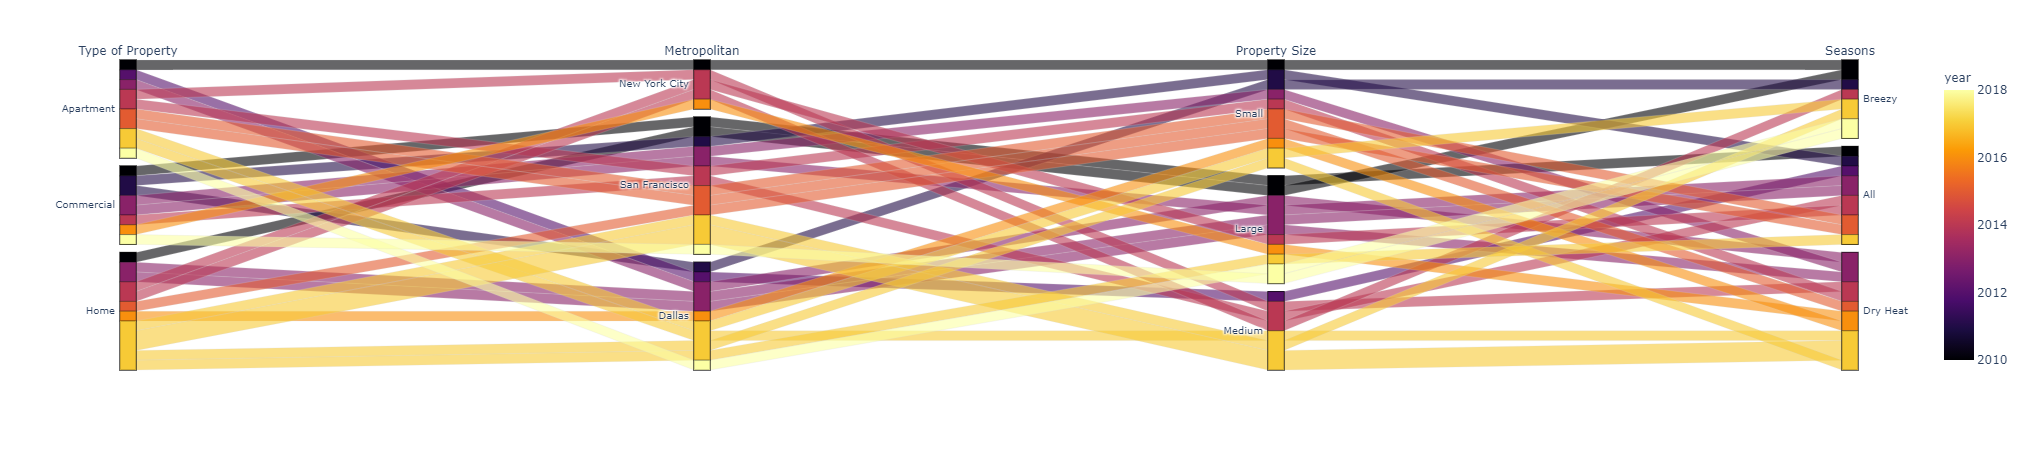

In [17]:
# Make call to create_parallel-categories_plot
plot1 = create_parallel_categories_plot(30)
plot1

 ### Create interact widget to dynamically change size of plotted dataset

In [24]:
# Use interact function to create interaction widget
interact(create_parallel_categories_plot, number_of_records=20)

Column
    [0] Column
        [0] IntSlider(end=60, name='number_of_records', start=-20, value=20)
    [1] Row
        [0] Plotly(Figure, name='interactive00207')

 ## Create Pane using panel.pane.Plotly function

 ### Manually convert plot to a pane

In [21]:
# Use panel.Pane.Plotly function to convert plot to pane
pane = pn.pane.Plotly(create_parallel_categories_plot(30))
pane

Plotly(Figure)

 ### Check pane type

In [12]:
# Check the pane type using the pprint() function
# To see the type of the pane use the pprint method, which works with any Widget, Pane, or (perhaps most usefully) Panel:
pane.pprint()

Plotly(Figure, relayout_data={'autosize': True})
